In [1]:
from astropy.coordinates import EarthLocation, AltAz, SkyCoord, get_moon, get_sun
from astropy import units as u
from astropy.time import Time
import astropy
import numpy as np
from astropy.visualization import astropy_mpl_style

In [2]:
from astroquery import mpc

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(astropy_mpl_style)

In [4]:
start_hr = 12
nsteps=289  # 24 hrs is 288 steps, so 289 entries
time_delta = 5*u.minute
Dwingeloo = astropy.coordinates.EarthLocation(lon=52.812477, lat=6.396933)

In [5]:
def get_scoords(date):
    start_time=Time('{date} {start}:0:0.000'.format(date=date, start=start_hr))
    timespan = nsteps * time_delta
    query = mpc.MPCClass()
    eph = query.get_ephemeris(target='gerdebruijn', start=start_time, step=time_delta, number=nsteps)
    scoords = SkyCoord(eph['RA'],eph['Dec'], obstime=eph['Date'], location=Dwingeloo).altaz
    return scoords

In [27]:
scoords = get_scoords(date ="2019-02-01")
Times = Time(scoords.obstime.datetime)
sun_coords = SkyCoord(get_sun(Times), location=Dwingeloo).altaz
moon_coords = SkyCoord(get_moon(Times), location=Dwingeloo).altaz

In [28]:
Alts = scoords.alt
Azs = scoords.az

In [29]:
SunAlts = sun_coords.alt
MoonAlts = moon_coords.alt
SunAzs = sun_coords.az
MoonAzs = moon_coords.az

In [30]:
tstart_from_midnight = start_hr - 24
tend_from_midnight = tstart_from_midnight + float((nsteps * time_delta)/u.hour)
x_times = np.linspace(tstart_from_midnight, tend_from_midnight, nsteps)

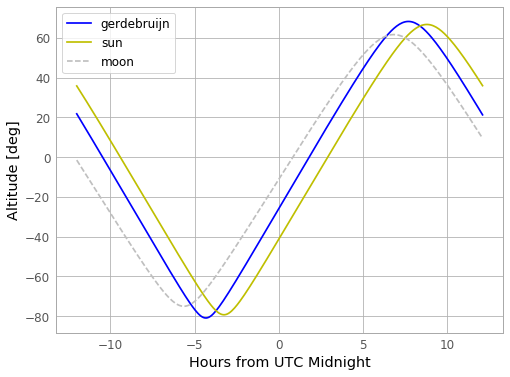

In [31]:
plt.plot(x_times, Alts, label='gerdebruijn', color='b')
plt.plot(x_times, SunAlts, label='sun', color='y')
plt.plot(x_times, MoonAlts, label='moon', color=[0.75]*3, ls='--')
plt.xlabel('Hours from UTC Midnight')
plt.ylabel('Altitude [deg]')
plt.legend(loc='upper left')

In [20]:
scolist = list()
for month in range(1,5):
    scolist.append(get_scoords(date = "2019-{mo}-01".format(mo=month)))

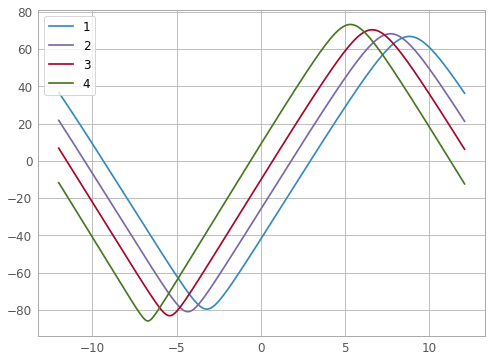

In [21]:
for iid, sco in enumerate(scolist):
    plt.plot(x_times, sco.alt, label=iid+1)
    plt.legend(loc='upper left')